In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('../../../dataset/pamap_features.csv', index_col=0)

dataset

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,100.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,100.0,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,100.0,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,100.0,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9


<Axes: xlabel='activityID', ylabel='count'>

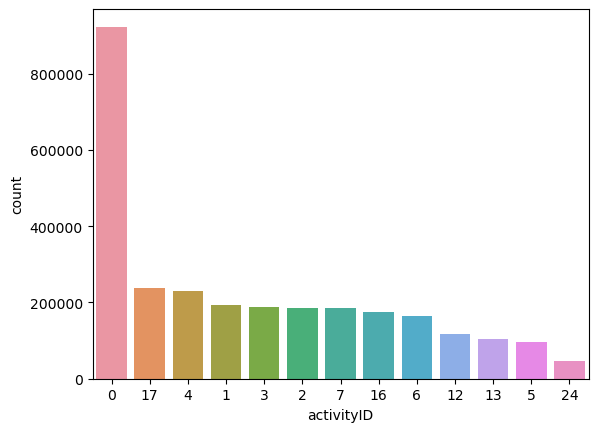

In [16]:
import seaborn as sns

sns.countplot(x='activityID', data=dataset, order=dataset.activityID.value_counts().index)

In [3]:
dataset['heartrate'] = dataset['heartrate'].fillna(dataset['heartrate'].mean())
dataset = dataset.dropna()
dataset.isna().sum()

dataset['activityID'].value_counts()

dataset.columns
col = dataset.columns.drop(['timestamp', 'activityID', 'heartrate', 'subject_id', 
                      'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                      'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                      'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
                      'handTemperature', 'chestTemperature', 'ankleTemperature',
                      'subject_id'])

In [4]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

X = dataset[col]
y= dataset['activityID']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = col)
scaled_X['label'] = y.values

scaled_X
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = col)
scaled_X['label'] = y.values

scaled_X.head(10)

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,label
0,1.224895,0.799466,0.087944,1.222699,0.856035,0.000235,-0.068503,0.028096,-0.006246,-0.269436,...,0.025797,-0.240078,0.739314,0.001341,0.070493,-0.011664,-1.507237,-1.875621,-3.689774,0
1,1.194172,0.793859,0.127324,1.215255,0.821161,0.075099,-0.016169,0.017868,0.009152,-0.260341,...,0.020130,-0.249625,0.729901,-0.012571,0.047067,-0.001840,-1.436290,-1.872474,-3.708535,0
2,1.225119,0.799518,0.097964,1.200268,0.818784,0.098732,-0.042074,0.000714,-0.000136,-0.287695,...,0.022951,-0.244854,0.729845,-0.003602,0.055140,0.010271,-1.483284,-1.896626,-3.702368,0
3,1.175183,0.787945,0.126912,1.205298,0.818747,0.098724,0.000859,0.000980,0.002100,-0.260686,...,0.022996,-0.251998,0.748941,-0.003452,0.020646,0.004130,-1.465983,-1.866532,-3.702157,0
4,1.201022,0.836238,0.137268,1.187819,0.828869,0.106585,0.012144,-0.015408,-0.032104,-0.232779,...,0.025816,-0.254382,0.748931,0.005454,0.030764,-0.003586,-1.524755,-1.895427,-3.695951,0
5,1.212757,0.835930,0.097475,1.192954,0.838828,0.110474,0.005174,-0.022237,-0.032897,-0.237137,...,0.025793,-0.249618,0.739375,-0.012115,0.027861,-0.001467,-1.459967,-1.871821,-3.702260,0
6,1.219072,0.835883,0.097623,1.195576,0.858786,0.098602,-0.015622,-0.071697,-0.028349,-0.251120,...,0.031456,-0.249610,0.748850,-0.036321,-0.036086,0.006494,-1.477708,-1.871349,-3.696034,0
7,1.224760,0.871941,0.057491,1.215742,0.878612,0.074901,0.017393,-0.060948,-0.018528,-0.260640,...,0.028601,-0.249620,0.734588,-0.024791,-0.012476,-0.002471,-1.471697,-1.876639,-3.696142,0
8,1.219428,0.884307,0.097365,1.223395,0.893543,0.070903,0.021847,-0.096028,-0.003026,-0.273753,...,0.031473,-0.235298,0.753521,0.006435,0.037951,0.007647,-1.512676,-1.906085,-3.690074,0
9,1.206085,0.878187,0.067038,1.220901,0.898555,0.066957,0.008561,-0.101344,-0.008475,-0.260149,...,0.025817,-0.247226,0.748885,0.000733,0.031404,0.005894,-1.489358,-1.881276,-3.689971,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [6]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[[     0 692581]
 [     1 143867]
 [     2 138404]
 [     3 141896]
 [     4 172563]
 [     5  71683]
 [     6 122319]
 [     7 138252]
 [    12  87783]
 [    13  78691]
 [    16 131389]
 [    17 178662]
 [    24  35561]]
Test data label statistics::
[[     0 230856]
 [     1  48423]
 [     2  46241]
 [     3  47088]
 [     4  57146]
 [     5  23958]
 [     6  40983]
 [     7  46192]
 [    12  29311]
 [    13  26174]
 [    16  43587]
 [    17  59240]
 [    24  12018]]


In [8]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[col], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[col], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(2133650, 1, 36) (2133650, 1)


In [15]:
X_train.shape, y_train.shape

((2133650, 1, 36), (2133650, 13))

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [11]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [12]:
# model = keras.Sequential()
# model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
# model.add(Dropout(rate = 0.5))
# model.add(Dense(units = 128, activation = "relu"))
# model.add(Dense(y_train.shape[1], activation = "softmax"))
# model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [13]:
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                8832      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 13)                429       
                                                                 
Total params: 9,261
Trainable params: 9,261
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/100
60009/60009 [==============================] - 71s 1ms/step - loss: 1.0220 - acc: 0.6705 - val_loss: 0.7351 - val_acc: 0.7635
Epoch 2/100
 1112/60009 [..............................] - ETA: 1:12 - loss: 0.9424 - acc: 0.6979

KeyboardInterrupt: 

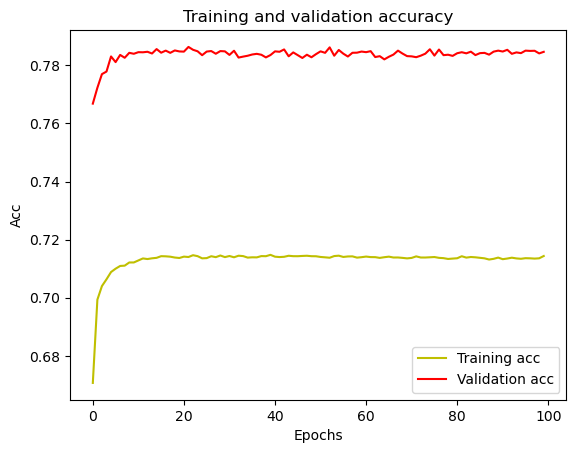

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['acc']
val_acc = history.history['val_acc']

x = np.arange(0, 100)
plt.plot(x, acc, 'y', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

22226/22226 [==============================] - 13s 543us/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

22226/22226 [==============================] - 12s 546us/step
Confusion Matrix
[[201596     22    600   2445  10598    254   2275   2802   1697   1508
    3860   3107     91]
 [  3448  44841     40     10      0      1      0      7      6      8
      50     11      1]
 [  3785      4  41813    286      2      1     27     18      6      0
     293      5      1]
 [  6118      0    270  40141     14      1      0      9      2      0
      30    503      0]
 [ 11956      0      7     18  42138     38     21   2649    264     26
      13      7      9]
 [  2218      5      1      0    196  19785     14   1431     78     48
      55      1    126]
 [  2698      0      0      4     23     19  37152    128     21     34
     747    151      6]
 [  5849      9     12      0   2431    259     29  37319    101     18
      48     75     42]
 [ 19544     18      1      4   1473    327    118    622   6130    297
     450    205    122]
 [ 17871     34     21      8    962    335    492    467

In [ ]:
score = model.evaluate(X_test, y_test)

pd.DataFrame(score)

22226/22226 [==============================] - 14s 626us/step - loss: 0.6784 - acc: 0.7842


,0
0,0.678430
1,0.784182
